# 1. Distribution of Data in General

### 1.1 Import packages for analysis & visualization

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("white")

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

### 1.2 Load cleaned dataset

In [2]:
med = pd.read_pickle("med.pkl")

In [3]:
med.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show,Day_Of_Week,Waiting_Days
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,Jardim Da Penha,0,1,0,0,0,0,No,Friday,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,Jardim Da Penha,0,0,0,0,0,0,No,Friday,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,Mata Da Praia,0,0,0,0,0,0,No,Friday,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,Pontal De Camburi,0,0,0,0,0,0,No,Friday,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,Jardim Da Penha,0,1,1,0,0,0,No,Friday,0


### 1.3 Distribution of numerical data

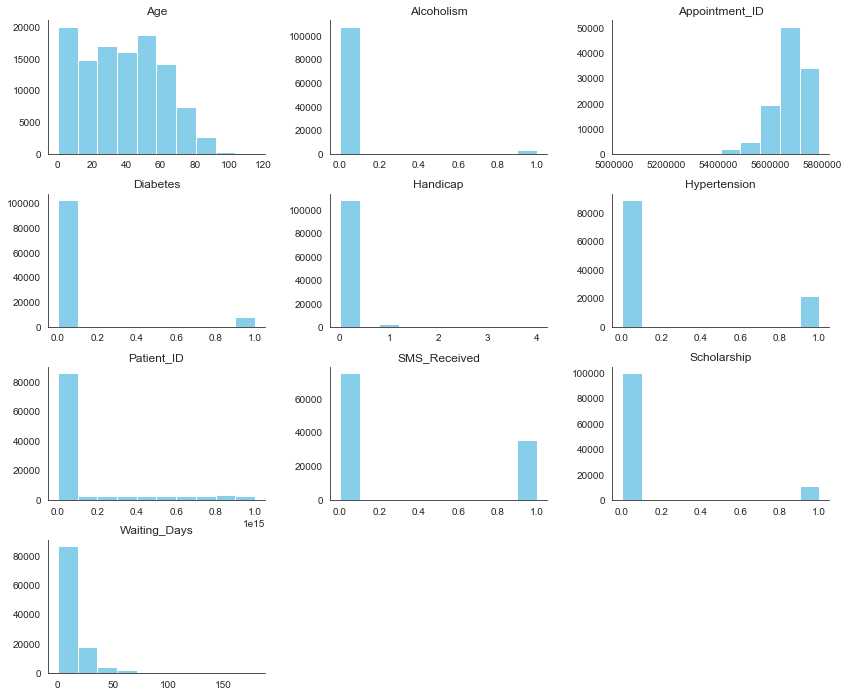

In [4]:
med.hist(figsize=(14,12),grid=False, color = "skyblue", sharex=False)
sns.despine(top=True, right=True);

### 1.4 Distribution of categorical data

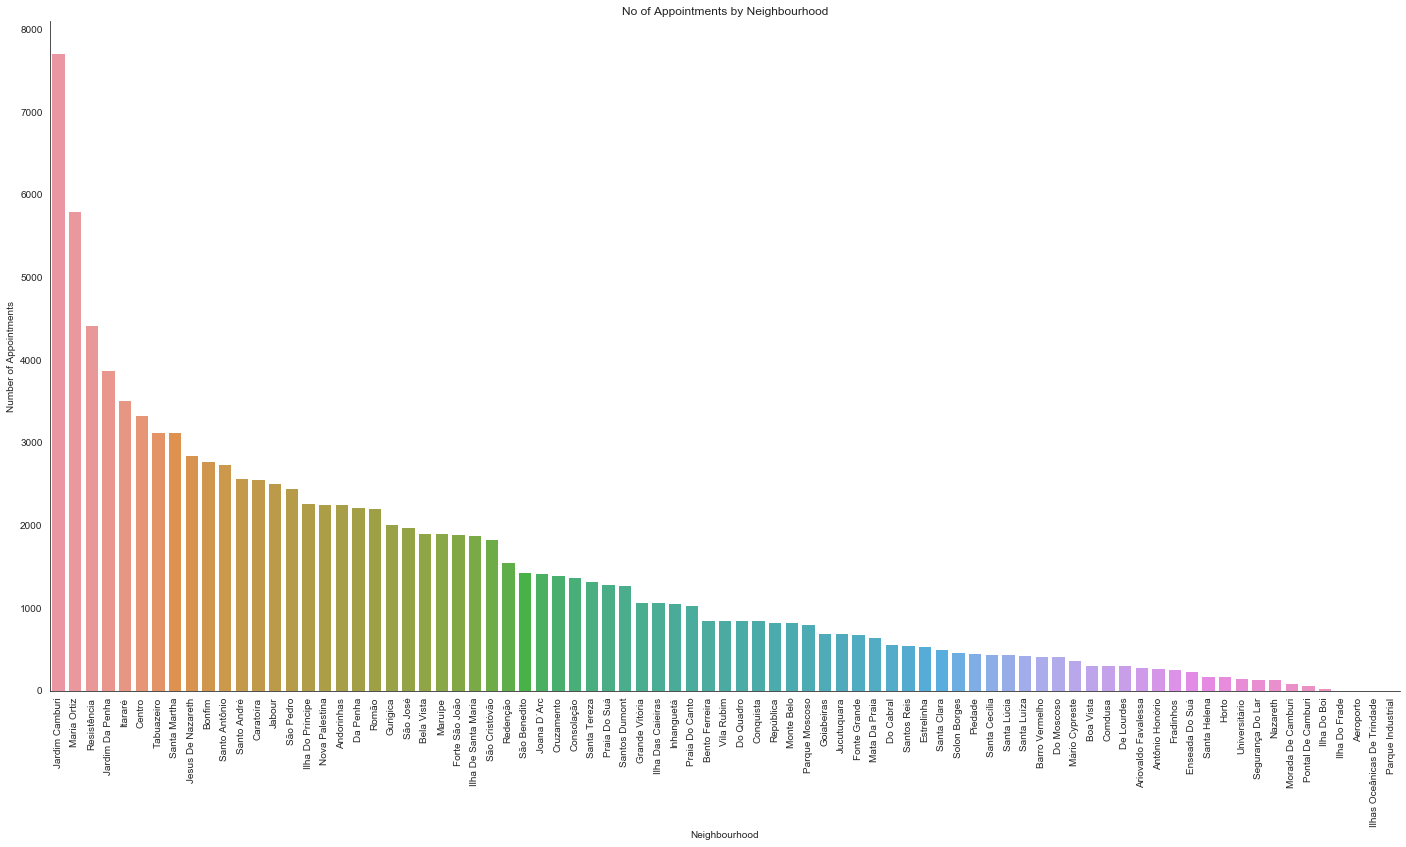

In [5]:
# Neighbourhood

ax = sns.catplot(x="Neighbourhood",
                 kind="count",
                 data=med,
                 height=10,
                 aspect=2,
                 order=med["Neighbourhood"].value_counts().index)
ax.set_xticklabels(rotation=90)
ax.set(ylabel='Number of Appointments',title="No of Appointments by Neighbourhood");


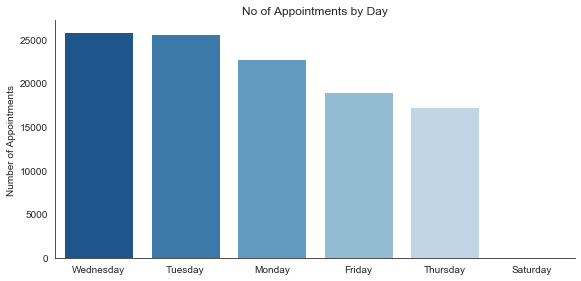

In [6]:
# Day Of Week

ax = sns.catplot(x="Day_Of_Week", kind="count", data=med, height=4, aspect=2, order=med["Day_Of_Week"].value_counts().index, palette="Blues_r")
ax.set(xlabel='',ylabel='Number of Appointments',title="No of Appointments by Day");

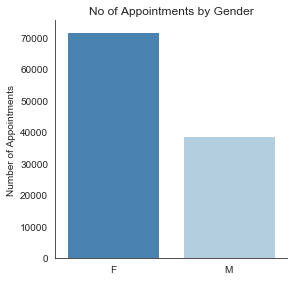

In [7]:
# Gender
ax = sns.catplot(x="Gender", kind="count", data=med, height=4, aspect=1, palette="Blues_r")
ax.set(xlabel='',ylabel='Number of Appointments',title="No of Appointments by Gender");

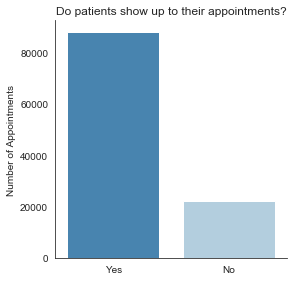

In [8]:
# No Show
ax = sns.catplot(x="No_Show", kind="count", data=med, height=4, aspect=1, palette="Blues_r")
ax.set(xlabel='',ylabel='Number of Appointments',title="Do patients show up to their appointments?")
ax.set_xticklabels(['Yes','No']);

In [9]:
#sns.pairplot(med);

### 1.5 Convert categorical data into numerical
    
    Gender: replace F with 1, M with 0.
    No-show: replace Yes with 1, No with 0.

In [12]:
med_numeric = med.copy()

In [13]:
med_numeric['Gender'] = (med_numeric['Gender'] == 'F').astype(int) #keeping Female (F) in Gender as 1, else 0
med_numeric['No_Show'] = (med_numeric['No_Show'] == 'Yes').astype(int) #keeping Yes in No_Show as 1, else 0

In [14]:
med_numeric.Gender.unique()

array([1, 0], dtype=int64)

In [15]:
med_numeric.No_Show.unique()

array([0, 1], dtype=int64)

In [16]:
med_numeric.dtypes

Patient_ID                  int64
Appointment_ID              int64
Gender                      int32
Scheduled_Day      datetime64[ns]
Appointment_Day    datetime64[ns]
Age                         int64
Neighbourhood              object
Scholarship                 int64
Hypertension                int64
Diabetes                    int64
Alcoholism                  int64
Handicap                    int64
SMS_Received                int64
No_Show                     int32
Day_Of_Week                object
Waiting_Days                int64
dtype: object

# 2. Distribution of Target Variable: No-Show

### 2.1 No-Shows by Gender

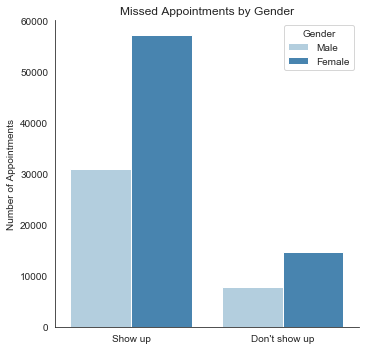

In [17]:
ax = sns.catplot(x="No_Show",
                 kind="count",
                 data=med_numeric,
                 hue="Gender",
                 ci=None,
                 palette="Blues",
                 legend_out = False)

# customize axis titles:
ax.set(xlabel='',ylabel='Number of Appointments',title="Missed Appointments by Gender")
ax.set_xticklabels(['Show up',"Don't show up"])

# customize legend:
leg = ax.axes.flat[0].get_legend()
new_title = 'Gender'
leg.set_title(new_title)
new_labels = ['Male', 'Female']
for t, l in zip(leg.texts, new_labels): t.set_text(l);

### 2.2 No-Shows by Age

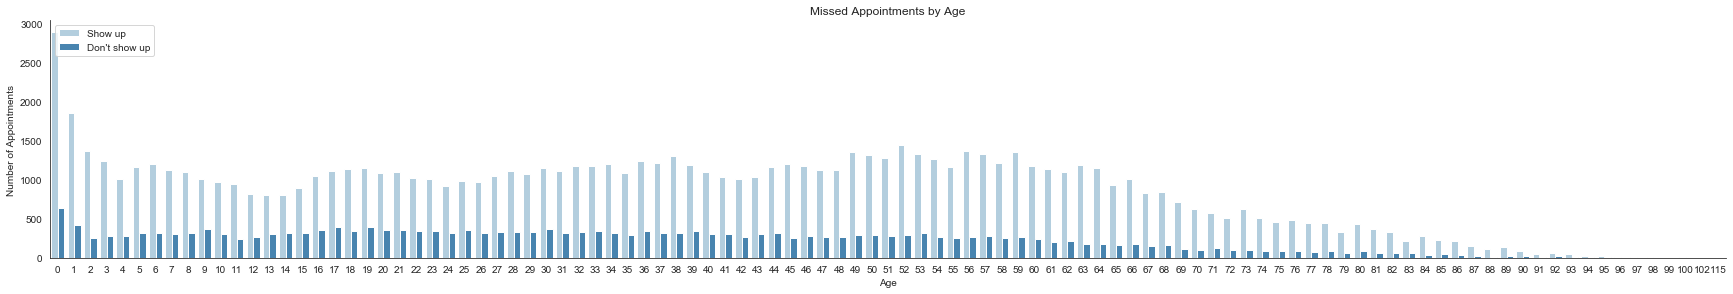

In [18]:
ax = sns.catplot(x="Age",
                 kind="count",
                 data=med_numeric,
                 hue="No_Show",
                 ci=None,
                 palette="Blues",
                 height=4,
                 aspect=6,
                 legend_out = False)

# customize axis titles:
ax.set(ylabel='Number of Appointments',title="Missed Appointments by Age")

# customize legend:
plt.legend(loc='upper left')
leg = ax.axes.flat[0].get_legend()
new_title = ''
leg.set_title(new_title)
new_labels = ['Show up', "Don't show up"]
for t, l in zip(leg.texts, new_labels): t.set_text(l);

### 2.3 No-Shows by Neighbourhood

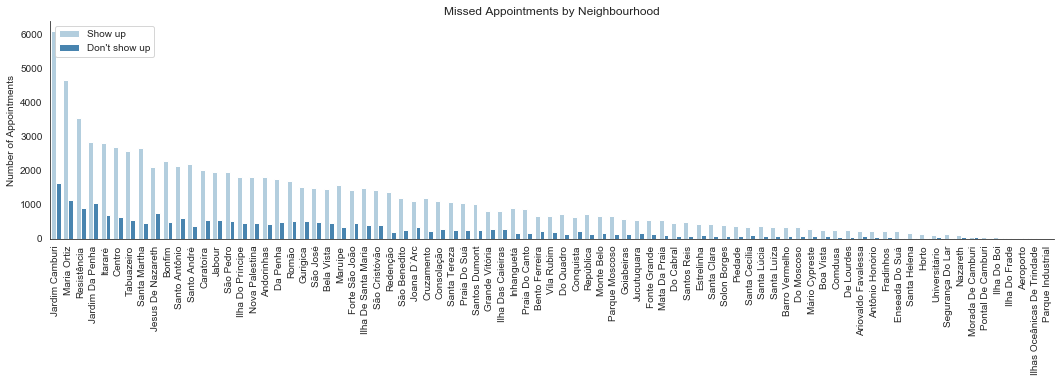

In [19]:
plt.figure(figsize=(18,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(med_numeric.Neighbourhood),
                   hue=med_numeric.No_Show,
                   order=med_numeric.Neighbourhood.value_counts().index,
                   palette="Blues")

# customize axis titles:
ax.set(ylabel='Number of Appointments',title="Missed Appointments by Neighbourhood")

# customize legend:
plt.legend(loc='upper left')
leg = ax.axes.get_legend()
new_title = ''
leg.set_title(new_title)
new_labels = ['Show up', "Don't show up"]
for t, l in zip(leg.texts, new_labels): t.set_text(l)
sns.despine(top=True, right=True);

In [25]:
neighbourhood_ratio = med_numeric[med_numeric.No_Show == 1].groupby(['Neighbourhood']).size()/med_numeric.groupby(['Neighbourhood']).size()

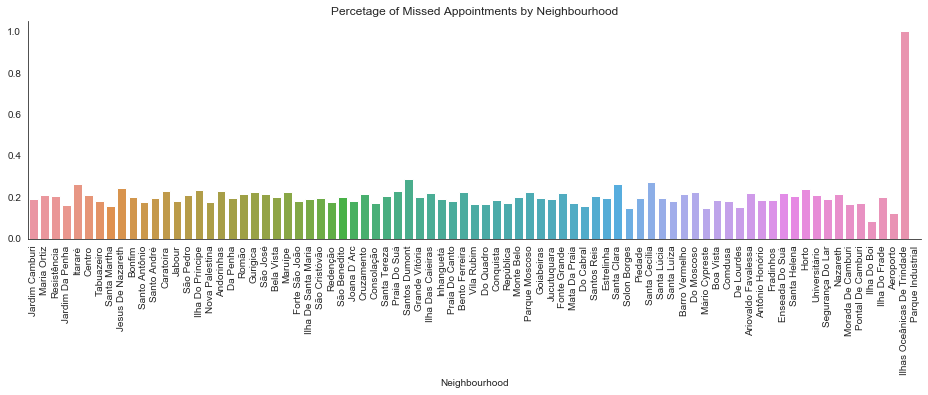

In [28]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=neighbourhood_ratio.index,
                 y=neighbourhood_ratio,
                 order=med.Neighbourhood.value_counts().index)

# customize axis:
ax.set_title("Percetage of Missed Appointments by Neighbourhood")
sns.despine(top=True, right=True)
plt.show();

### 2.4 No-Shows by Scholarship

### 2.5 No-Shows by Hypertension

### 2.6 No-Shows by Diabetes

### 2.7 No-Shows by Alcoholism

### 2.8 No-Shows by Handicap

### 2.9 No-Shows by SMS-Received

### 2.10 No-Shows by Day of Week

### 2.11 No-Shows by Waiting Days

# 3. Data Correlation

### 3.1 Correlation Heatmap

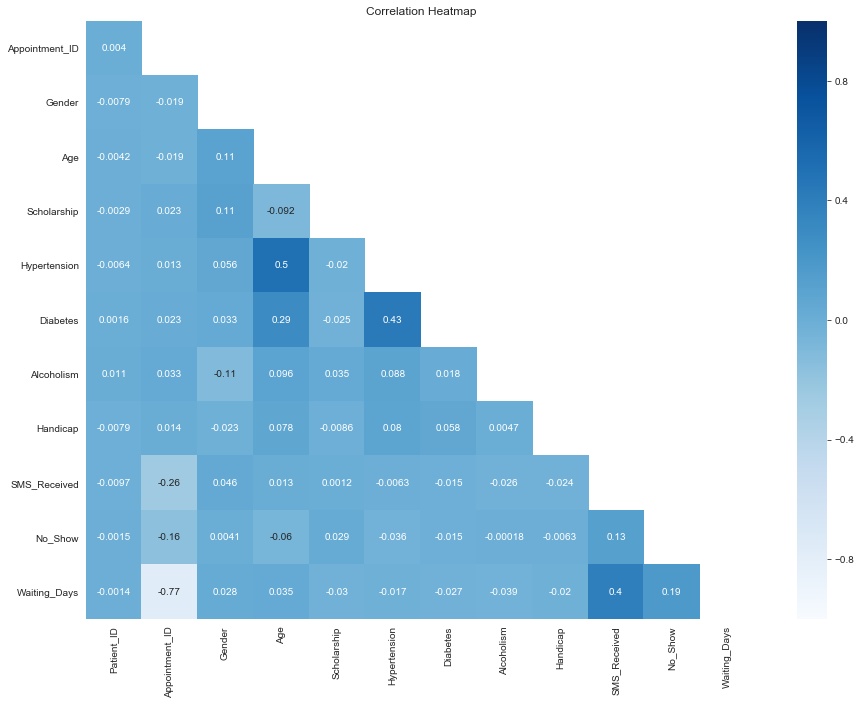

In [20]:
mask = np.zeros_like(med_numeric.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = plt.figure(figsize=(15,11))
ax = sns.heatmap(med_numeric.corr(),
            vmin=-1,
            vmax=1,
            cmap='Blues',
            annot=True,
            mask = mask)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top + 0.5)
ax.set(title="Correlation Heatmap");

### 2.2 Correlation Heatmap for No-Shows

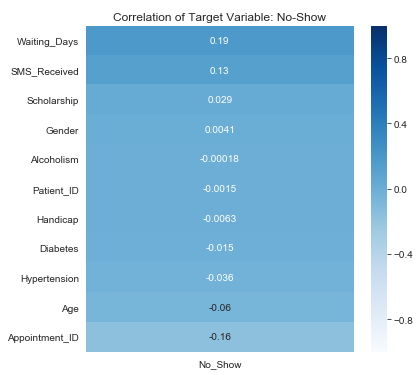

In [21]:
plt.figure(figsize=(6,6))
ax = sns.heatmap(med_numeric.corr()[['No_Show']].sort_values(by=['No_Show'],ascending=False),
            vmin=-1,
            vmax=1,
            cmap='Blues',
            annot=True);

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top + 0.5)
ax.set(title="Correlation of Target Variable: No-Show");